
**Python Blok Projesi**<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>

<p>Nobel Ödülü belki de dünyanın en tanınmış bilimsel ödülüdür. Her yıl kimya, edebiyat, fizik, tıp, ekonomi ve barış alanlarında bilim insanlarına ve akademisyenlere verilmektedir. Bu projede, Nobel Ödülü kazananları inceleyeceğiz. </p>

## Proje Soruları

1. Nobel Ödüllerini en çok kazanan ilk on ülkeyi bulunuz.
2. Nobel Ödüllerini kazanan ilk kadınları listeleyiniz.
3. Nobel Ödüllerini kazanan ilk erkekleri listeleyiniz.
4. Nobel ödülünü en çok kazanan ülkenin hangi yıldan itibaren hakimiyet sağladığını görselleştirip bu hakimiyette rol oynayan şeyler nelerdir? İçgörülerinizi paylaşır mısınız?
5. Nobel Ödülü kazananların cinsiyetlerini, yaşlarını, ödül kategorisi ve yılları kullanarak görselleştiriniz.(Her bir ödül kategorisi için ayrı grafik gösteriniz) Çıkan sonuçlara göre görseli yorumlayınız.
6. 1938-1945 yılı arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.
7. 1947-1991 yılları arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.(Her kategori için ayrı bir grafik olması istenmektedir)
8. Kimya, Edebiyat, Barış, Fizik ve Tıp kategorilerindeki 2000 sonrasındaki kişilerin ülkelerini, yaşlarını görselleştirin.(Her bir Kategori için ayrı görselleştirme yapılması istenmektedir) Veriyi yorumlayınız.


In [4]:
import pandas as pd
data = pd.read_csv("C:\\Users\\kirgi\\Python\\asset-v1_Kodlasam+MS01+2023_06+type@asset+block@nobel.csv")
yeni_sutun_isimleri = {"year":"yil",
                       "category":"kategori",
                       "prize":"odul", 
                       "laureate_id": "odul_sahibi_kimlik_numarasi",
                       "laureate_type": "odul_sahibi_turu",
                       "full_name": "tam_isim",
                       "birth_date": "dogum_tarihi",
                       "birth_country": "dogum_ulkesi",
                       "sex": "cinsiyet",
                       "organization_name": "organizasyon_adi",
                       "organization_country": "organizasyon_ulkesi",
                      }
data = data.rename(columns=yeni_sutun_isimleri)
data= data[["yil","kategori","odul","odul_sahibi_kimlik_numarasi","odul_sahibi_turu","tam_isim","dogum_tarihi","dogum_ulkesi","cinsiyet",
            "organizasyon_adi","organizasyon_ulkesi"]]    
data.head()

,yil,kategori,odul,odul_sahibi_kimlik_numarasi,odul_sahibi_turu,tam_isim,dogum_tarihi,dogum_ulkesi,cinsiyet,organizasyon_adi,organizasyon_ulkesi
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Netherlands,Male,Berlin University,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,569,Individual,Sully Prudhomme,1839-03-16,France,Male,NaN,NaN
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,293,Individual,Emil Adolf von Behring,1854-03-15,Prussia (Poland),Male,Marburg University,Germany
3,1901,Peace,The Nobel Peace Prize 1901,462,Individual,Jean Henry Dunant,1828-05-08,Switzerland,Male,NaN,NaN
4,1901,Peace,The Nobel Peace Prize 1901,463,Individual,Frédéric Passy,1822-05-20,France,Male,NaN,NaN


<h1>1.Nobel Ödüllerini en çok kazanan ilk on ülkeyi bulunuz.</h1>

In [8]:

from IPython.display import display
ulkeler_toplam_odul_df = data.groupby('dogum_ulkesi')['odul'].count().reset_index(name='toplam_odul_sayisi')
display(ulkeler_toplam_odul_df)
ulkeler_sirali_df = ulkeler_toplam_odul_df.sort_values(by='toplam_odul_sayisi',ascending=False)
display(ulkeler_sirali_df)
ilk_10_ulke_df = ulkeler_sirali_df.head(10)
display(ilk_10_ulke_df)

,dogum_ulkesi,toplam_odul_sayisi
0,Argentina,4
1,Australia,10
2,Austria,14
3,Austria-Hungary (Austria),1
4,Austria-Hungary (Bosnia and Herzegovina),1
...,...,...
116,Venezuela,1
117,Vietnam,1
118,W&uuml;rttemberg (Germany),1
119,West Germany (Germany),5


,dogum_ulkesi,toplam_odul_sayisi
115,United States of America,259
114,United Kingdom,85
43,Germany,61
39,France,51
104,Sweden,29
...,...,...
47,Gold Coast (Ghana),1
42,German-occupied Poland (Poland),1
40,Free City of Danzig (Poland),1
37,Faroe Islands (Denmark),1


,dogum_ulkesi,toplam_odul_sayisi
115,United States of America,259
114,United Kingdom,85
43,Germany,61
39,France,51
104,Sweden,29
59,Japan,24
25,Canada,18
70,Netherlands,18
58,Italy,17
89,Russia,17


<h1>2.Nobel Ödüllerini kazanan ilk kadınları listeleyiniz.</h1>

In [10]:
kadınlar_df = data[data['cinsiyet'] == 'Female']
kadınlar_yil_df = kadınlar_df[['tam_isim', 'yil']]
kadınlar_sirali_df = kadınlar_yil_df.sort_values(by='yil', ascending=True)
display(kadınlar_sirali_df)

,tam_isim,yil
19,"Marie Curie, née Sklodowska",1903
29,"Baroness Bertha Sophie Felicita von Suttner, n...",1905
51,Selma Ottilia Lovisa Lagerlöf,1909
62,"Marie Curie, née Sklodowska",1911
128,Grazia Deledda,1926
141,Sigrid Undset,1928
160,Jane Addams,1931
179,Irène Joliot-Curie,1935
198,Pearl Buck,1938
218,Gabriela Mistral,1945


<h1>3.Nobel Ödüllerini kazanan ilk erkekleri listeleyiniz.</h1>

In [12]:
erkekler_df = data[data['cinsiyet'] == 'Male']
erkekler_yil_df = erkekler_df[['tam_isim', 'yil']]
erkekler_sirali_df = erkekler_yil_df.sort_values(by='yil', ascending=True)
display(erkekler_sirali_df)

,tam_isim,yil
0,Jacobus Henricus van 't Hoff,1901
1,Sully Prudhomme,1901
2,Emil Adolf von Behring,1901
3,Jean Henry Dunant,1901
4,Frédéric Passy,1901
...,...,...
905,Bob Dylan,2016
906,Yoshinori Ohsumi,2016
907,Juan Manuel Santos,2016
908,David J. Thouless,2016


<h1>4.Nobel ödülünü en çok kazanan ülkenin hangi yıldan itibaren hakimiyet sağladığını görselleştirip bu hakimiyette rol oynayan şeyler nelerdir? İçgörülerinizi paylaşır mısınız?</h1>

En çok ödül kazanan ülke: United States of America, Kazanılan ödül sayısı: 259
United States of America ülkesinin ilk ödül kazandığı yıl: 1906
United States of America ülkesinin ödül aldığı kategoriler ve yıllar:
kategori  Chemistry  Economics  Literature  Medicine  Peace  Physics
yil                                                                 
1906            0.0        0.0         0.0       0.0    1.0      0.0
1912            0.0        0.0         0.0       0.0    1.0      0.0
1914            1.0        0.0         0.0       0.0    0.0      0.0
1919            0.0        0.0         0.0       0.0    1.0      0.0
1923            0.0        0.0         0.0       0.0    0.0      1.0
...             ...        ...         ...       ...    ...      ...
2012            2.0        2.0         0.0       0.0    0.0      1.0
2013            0.0        3.0         0.0       2.0    0.0      0.0
2014            2.0        0.0         0.0       1.0    0.0      0.0
2015            1.0        0

,dogum_ulkesi,odul_sayisi
0,France,1
1,Italy,1
2,Spain,1
3,Tuscany (Italy),1
4,United Kingdom,1
5,United States of America,1


En çok ödül alınan kategori: Medicine, Toplam ödül sayısı: 211
1906 yılında 'Medicine' kategorisinde ödül kazanan ülkeler ve ödül sayıları:
  dogum_ulkesi  odul_sayisi
0        Italy            1
1        Spain            1


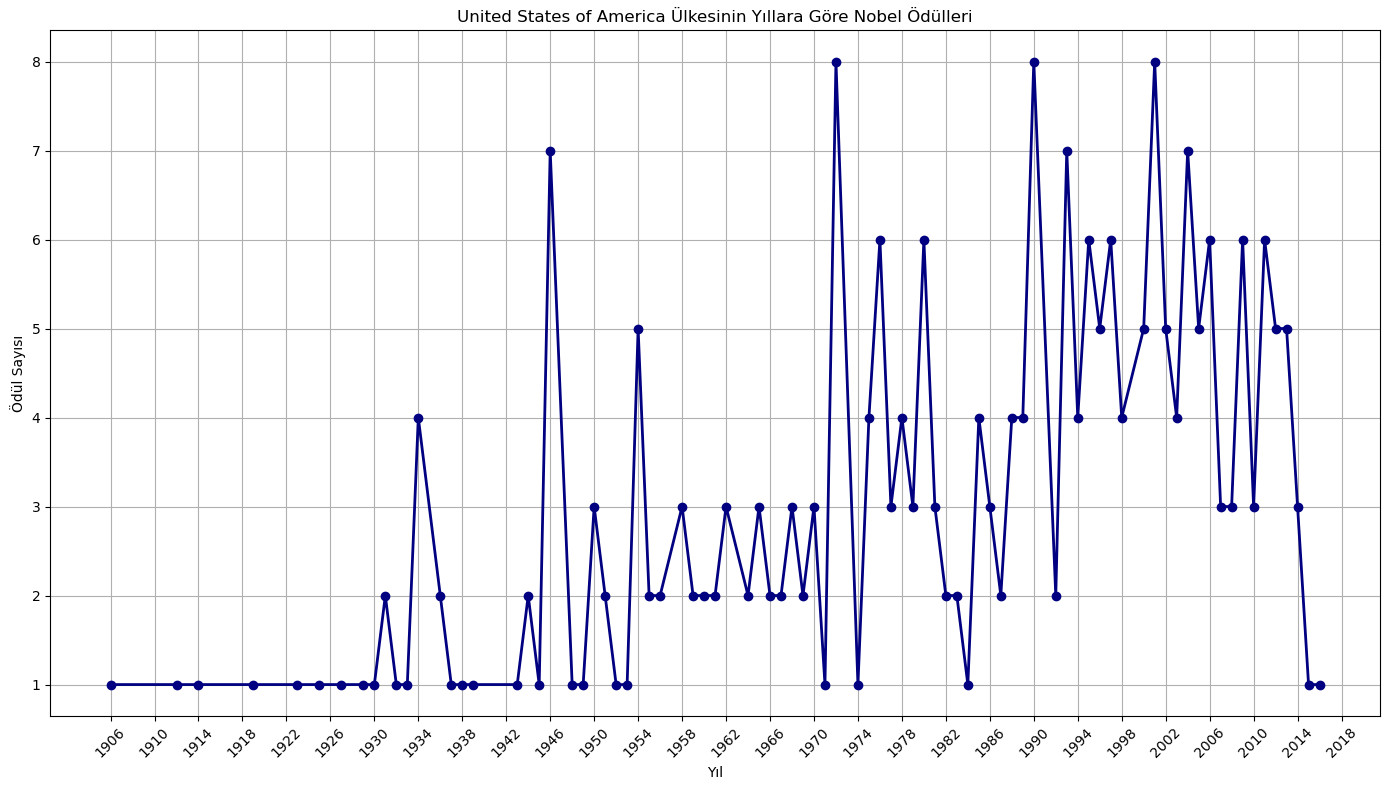

In [16]:
ulkeler_odul_sayisi = data.groupby('dogum_ulkesi')['odul'].count()
en_cok_odul_kazanan_ulke, en_cok_odul_sayisi = ulkeler_odul_sayisi.idxmax(), ulkeler_odul_sayisi.max()
print(f"En çok ödül kazanan ülke: {en_cok_odul_kazanan_ulke}, Kazanılan ödül sayısı: {en_cok_odul_sayisi}")
ulke_verisi = data[data['dogum_ulkesi'] == en_cok_odul_kazanan_ulke]
ilk_odul_yili = ulke_verisi['yil'].min()
print(f"{en_cok_odul_kazanan_ulke} ülkesinin ilk ödül kazandığı yıl: {ilk_odul_yili}")

kategori_yil_odul_sayisi = ulke_verisi.groupby(['yil', 'kategori'])['odul'].count().unstack().fillna(0)
print(f"{en_cok_odul_kazanan_ulke} ülkesinin ödül aldığı kategoriler ve yıllar:")
print(kategori_yil_odul_sayisi)

yil_verisi = data[data['yil'] == ilk_odul_yili]
ulkeler_odul_sayisi_yili = yil_verisi.groupby('dogum_ulkesi')['odul'].count().reset_index()
ulkeler_odul_sayisi_yili.columns = ['dogum_ulkesi', 'odul_sayisi']
print(f"{ilk_odul_yili} yılında ülkelerin kazandığı ödül sayıları:")
display(ulkeler_odul_sayisi_yili)

kategori_odul_sayisi = data.groupby('kategori')['odul'].count().reset_index(name='odul_sayisi')
en_cok_odul_alinan_kategori = kategori_odul_sayisi.loc[kategori_odul_sayisi['odul_sayisi'].idxmax()]
print(f"En çok ödül alınan kategori: {en_cok_odul_alinan_kategori['kategori']}, Toplam ödül sayısı: {en_cok_odul_alinan_kategori['odul_sayisi']}")



data_1906 = data[data['yil'] == 1906]
medicine_1906 = data_1906[data_1906['kategori'] == 'Medicine']
ulke_odul_sayisi_medicine_1906 = medicine_1906.groupby('dogum_ulkesi')['odul'].count().reset_index(name='odul_sayisi')
print(f"1906 yılında 'Medicine' kategorisinde ödül kazanan ülkeler ve ödül sayıları:")
print(ulke_odul_sayisi_medicine_1906)

import matplotlib.pyplot as plt

ulkeler_odul_sayisi = data.groupby('dogum_ulkesi')['odul'].count()
en_cok_odul_kazanan_ulke = ulkeler_odul_sayisi.idxmax()
en_cok_odul_kazanan_veri = data[data['dogum_ulkesi'] == en_cok_odul_kazanan_ulke]
yil_odul_sayisi = en_cok_odul_kazanan_veri.groupby('yil')['odul'].count()

# Grafik
plt.figure(figsize=(14, 8))
plt.plot(yil_odul_sayisi.index, yil_odul_sayisi.values, marker='o', color='#000080', linestyle='-', linewidth=2)

plt.title(f'{en_cok_odul_kazanan_ulke} Ülkesinin Yıllara Göre Nobel Ödülleri')
plt.xlabel('Yıl')
plt.ylabel('Ödül Sayısı')
plt.xticks(range(int(yil_odul_sayisi.index.min()), int(yil_odul_sayisi.index.max()) + 4, 4), rotation=45)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2>
ABD'nin Nobel ödüllerinde uzun süreli bir etkisi olduğu ve çok sayıda ödül kazandığı açık.1934 ve 1946 yılları arasında ödül sayısında gözlemlenen artış, diğer yıllar için bir referans noktası oluşturmuştur. Bu, ABD'nin bilim, edebiyat, barış ve diğer alanlarda
önemli katkılarda bulunduğunu gösteriyor. Uzun vadeli bir hakimiyete sahip olduğundan, bu ülkedeki Nobel ödüllerinin artışı, ülkenin uluslararası
arenadaki bilimsel ve kültürel etkisinin bir göstergesi olabilir.

1906 yılında Nobel ödüllerinin çoğunluğunun Medicine (Tıp) kategorisinde verildiği, ancak bu kategoride sadece İtalya ve İspanya'nın ödül kazandığı 
görülüyor. Bu, o yıl içinde Tıp alanında önemli gelişmeler yaşandığını, ancak bu ödüllerin özellikle belirli ülkeler arasında paylaştırıldığını gösterir.
</h2>

<h1>5.Nobel Ödülü kazananların cinsiyetlerini, yaşlarını, ödül kategorisi ve yılları kullanarak görselleştiriniz.(Her bir ödül kategorisi için ayrı grafik gösteriniz) Çıkan sonuçlara göre görseli yorumlayınız.</h1>

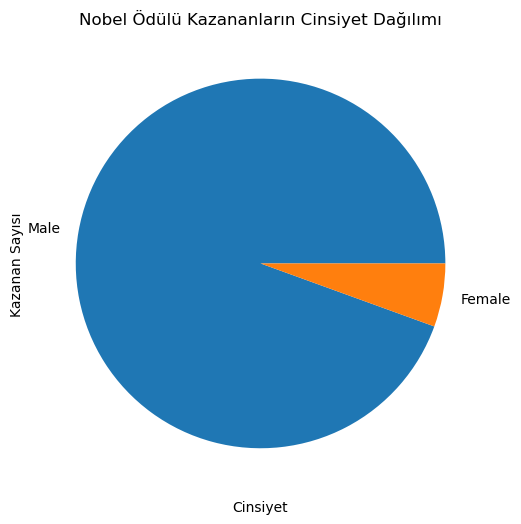

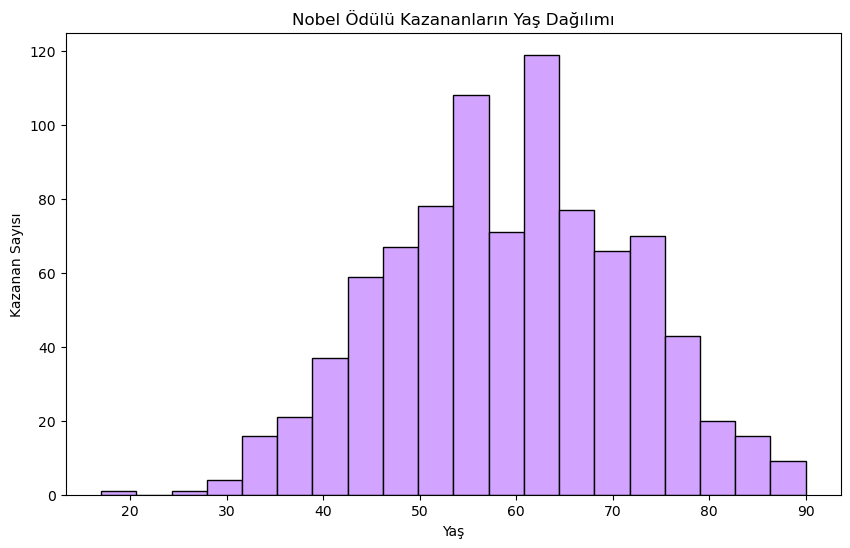

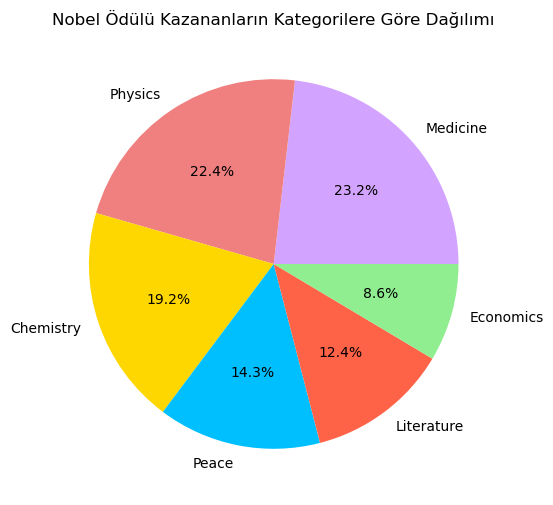

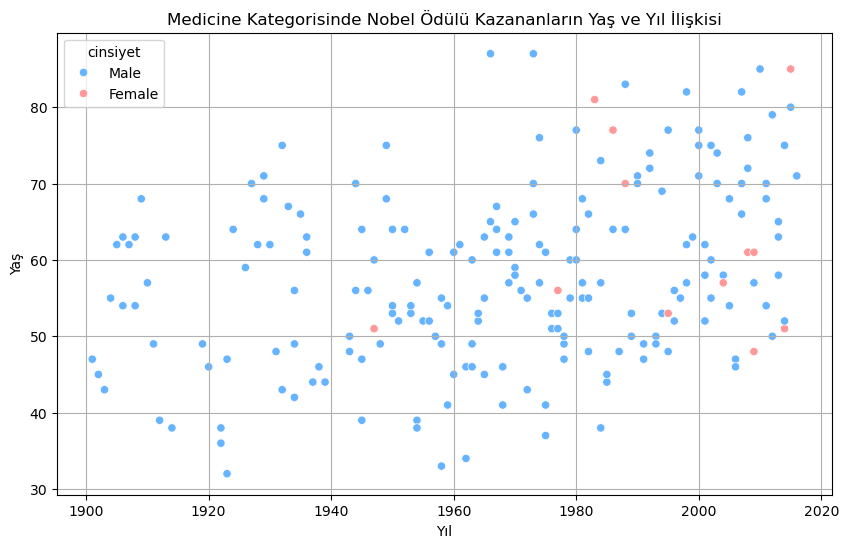

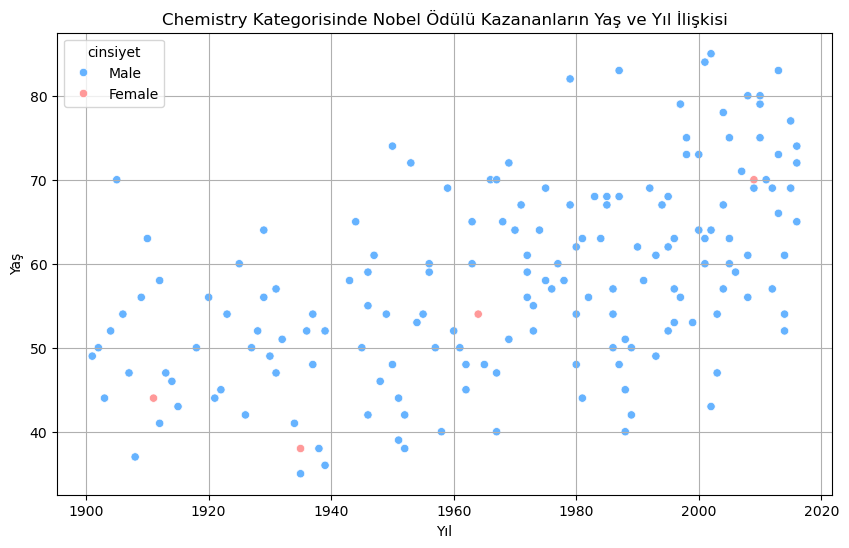

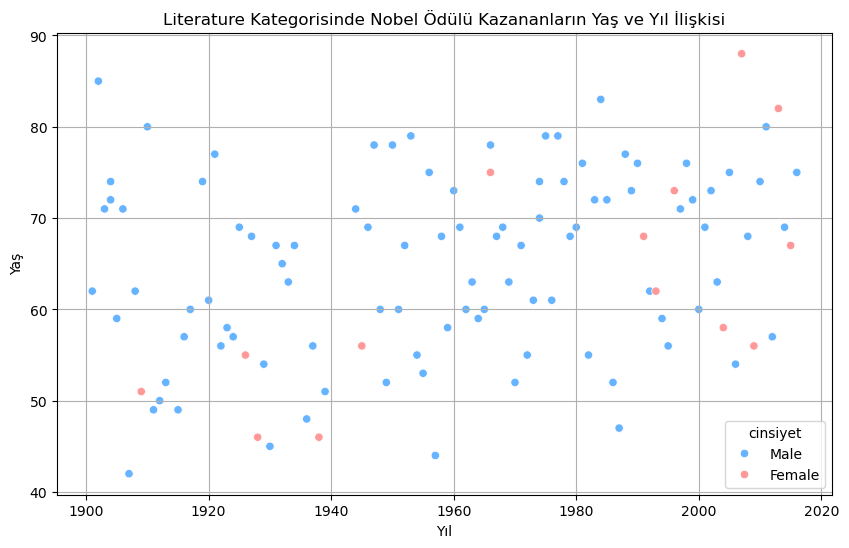

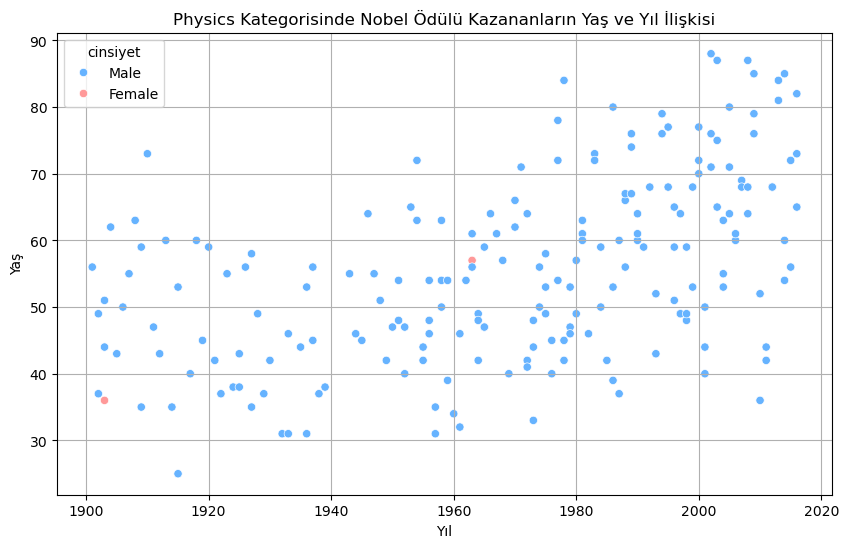

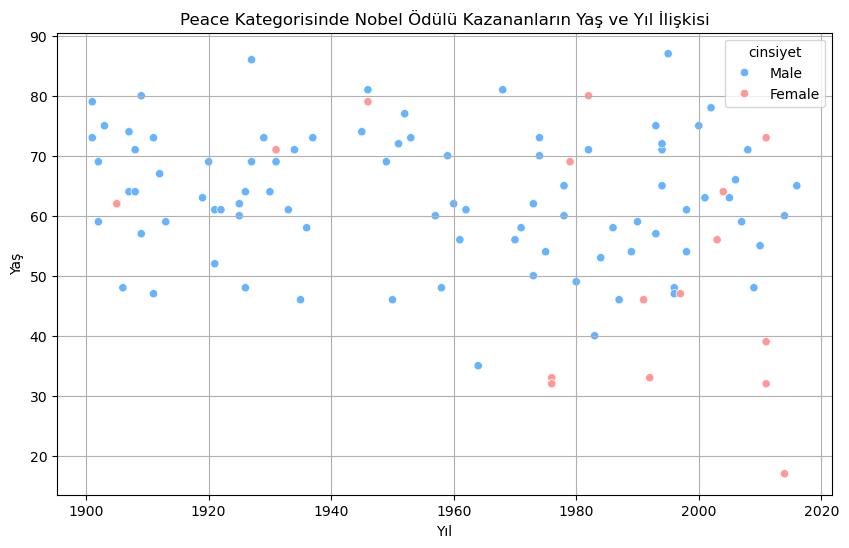

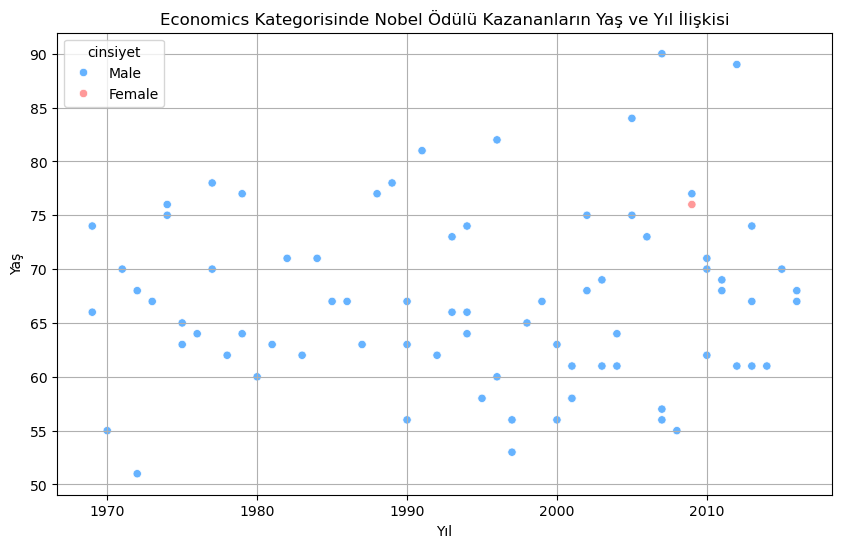

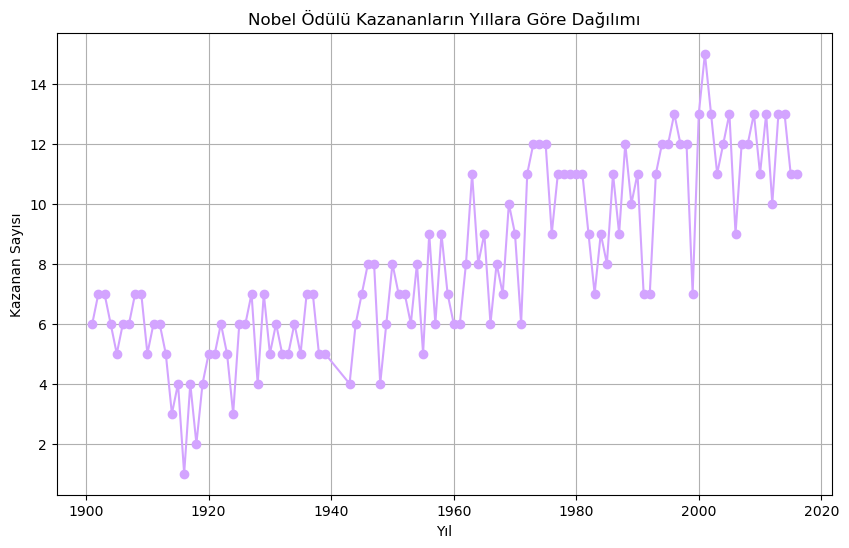

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Nobel ödülü kazananların cinsiyetlerini görselleştirelim
cinsiyet_sayim = data['cinsiyet'].value_counts()
plt.figure(figsize=(10, 6))
cinsiyet_sayim.plot(kind='pie', color=['#F08080','#D3A4FF',])  
plt.title('Nobel Ödülü Kazananların Cinsiyet Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Kazanan Sayısı')
plt.xticks(rotation=0)
plt.show()

#Nobel ödülü kazananların yaşlarını görselleştirelim
from datetime import datetime

data['dogum_tarihi'] = pd.to_datetime(data['dogum_tarihi'])

# Yaşı hesaplama (ödül aldığı yıl - doğum yılı)
data['yas'] = data['yil'] - data['dogum_tarihi'].dt.year

plt.figure(figsize=(10, 6))
plt.hist(data['yas'], bins=20, color='#D3A4FF', edgecolor='black')
plt.title('Nobel Ödülü Kazananların Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Kazanan Sayısı')
plt.show()

#Nobel ödülü kazananların ödül kategorilerini görselleştirelim
kategori_sayim = data['kategori'].value_counts()
plt.figure(figsize=(10, 6))
kategori_sayim.plot(kind='pie', autopct='%1.1f%%', colors=['#D3A4FF', '#F08080', '#FFD700', '#00BFFF', '#FF6347', '#90EE90'])
plt.title('Nobel Ödülü Kazananların Kategorilere Göre Dağılımı')
plt.ylabel('')
plt.show()

#Nobel ödülü kazananların ödül kategorilerini ayrı ayrı yaş ve yıl ilişkisine göre görselleştirelim
#Medicine
data['dogum_tarihi'] = pd.to_datetime(data['dogum_tarihi'])
data['yas'] = data['yil'] - data['dogum_tarihi'].dt.year
medicine_data = data[data['kategori'] == 'Medicine']
#Grafik
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yil', y='yas', data=medicine_data, hue='cinsiyet', palette=['#66B3FF','#FF9999'])
plt.title('Medicine Kategorisinde Nobel Ödülü Kazananların Yaş ve Yıl İlişkisi')
plt.xlabel('Yıl')
plt.ylabel('Yaş')
plt.grid(True)
plt.show()

#Chemistry
data['dogum_tarihi'] = pd.to_datetime(data['dogum_tarihi'])
data['yas'] = data['yil'] - data['dogum_tarihi'].dt.year
chemistry_data = data[data['kategori'] == 'Chemistry']
#Grafik
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yil', y='yas', data=chemistry_data, hue='cinsiyet', palette=['#66B3FF','#FF9999'])
plt.title('Chemistry Kategorisinde Nobel Ödülü Kazananların Yaş ve Yıl İlişkisi')
plt.xlabel('Yıl')
plt.ylabel('Yaş')
plt.grid(True)
plt.show()

#Literature
data['dogum_tarihi'] = pd.to_datetime(data['dogum_tarihi'])
data['yas'] = data['yil'] - data['dogum_tarihi'].dt.year
literature_data = data[data['kategori'] == 'Literature']
#Grafik
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yil', y='yas', data=literature_data, hue='cinsiyet', palette=['#66B3FF','#FF9999'])
plt.title('Literature Kategorisinde Nobel Ödülü Kazananların Yaş ve Yıl İlişkisi')
plt.xlabel('Yıl')
plt.ylabel('Yaş')
plt.grid(True)
plt.show()

#Physics 
data['dogum_tarihi'] = pd.to_datetime(data['dogum_tarihi'])
data['yas'] = data['yil'] - data['dogum_tarihi'].dt.year
physics_data = data[data['kategori'] == 'Physics']
#Grafik
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yil', y='yas', data=physics_data, hue='cinsiyet', palette=['#66B3FF','#FF9999'])
plt.title('Physics Kategorisinde Nobel Ödülü Kazananların Yaş ve Yıl İlişkisi')
plt.xlabel('Yıl')
plt.ylabel('Yaş')
plt.grid(True)
plt.show()

#Peace
data['dogum_tarihi'] = pd.to_datetime(data['dogum_tarihi'])
data['yas'] = data['yil'] - data['dogum_tarihi'].dt.year
peace_data = data[data['kategori'] == 'Peace']
#Grafik
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yil', y='yas', data=peace_data, hue='cinsiyet', palette=['#66B3FF','#FF9999'])
plt.title('Peace Kategorisinde Nobel Ödülü Kazananların Yaş ve Yıl İlişkisi')
plt.xlabel('Yıl')
plt.ylabel('Yaş')
plt.grid(True)
plt.show()

#Economics
data['dogum_tarihi'] = pd.to_datetime(data['dogum_tarihi'])
data['yas'] = data['yil'] - data['dogum_tarihi'].dt.year
economics_data = data[data['kategori'] == 'Economics']
#Grafik
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yil', y='yas', data=economics_data, hue='cinsiyet', palette=['#66B3FF','#FF9999'])
plt.title('Economics Kategorisinde Nobel Ödülü Kazananların Yaş ve Yıl İlişkisi')
plt.xlabel('Yıl')
plt.ylabel('Yaş')
plt.grid(True)
plt.show()

#Nobel ödülü kazananların kazandığı yılları görselleştirelim
yil_sayim = data['yil'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(yil_sayim.index, yil_sayim.values, marker='o', linestyle='-', color='#D3A4FF')  # Lila rengi kullanarak
plt.title('Nobel Ödülü Kazananların Yıllara Göre Dağılımı')
plt.xlabel('Yıl')
plt.ylabel('Kazanan Sayısı')
plt.grid(True)
plt.show()




<h2>İlk grafiğe baktığımızda Nobel ödülü alan erkeklerin sayısının kadınlardan fazla olduğunu görüyoruz. Bunun sebepleri arasında önyargılar, ayrımcılık, tarihi ve toplumsal cinsiyet eşitsizliklerini sayabiliriz. İkinci grafiğe geldiğimizde yaş dağılımının 50-70 yaş aralığında en yüksek olduğunu görüntülüyoruz.  50-70 yaş aralığının, bir bilim insanının akademik kariyerinde en üretken olduğu dönem olarak kabul edilmesi bu durumu açıklıyor. Nobel ödülü kazananların kategorik dağılımlarına baktığımızda en çok ödül alan kategorinin tıp en az ödül alan kategorinin ekonomi olduğunu görüyoruz.Tıp kategorisindeki yüksek ödül sayısı, savaşlar ve sağlık krizleriyle ilişkili olabilirken, Ekonomik teorilerin kabul sürecinin uzunluğu, bu kategorideki ödül sayısının daha az olmasına yol açmış olabilir.Nobel ödülü kazananların yaş ve yıl ilişkisine baktığımızda  50-70 yaş aralığında dalgalı bir seyir gözlemlenmektedir. Nobel Ödülü kazananların genellikle deneyimli bilim insanları olması, bilimsel çalışmaların genellikle uzun soluklu bir süreç olduğunu ve önemli buluşların yapılması için derinlemesine bilgi ve deneyim gerektiğini göstermektedir. Nobel ödülü kazananların yıllara göre dağılımına baktığımızda ilk bakışta, ödüllerin sayısında belirgin dalgalanmalar olduğunu görürüz. Savaş yıllarında bilimsel çalışmaların sekteye uğraması, ekonomik krizler, ya da Nobel Komitesi'nin karar verme süreçlerindeki değişiklikler gibi faktörler bu dalgalanmalara neden olabilir.Grafikte, özellikle 20. yüzyılın ikinci yarısından itibaren ödül sayısında belirgin bir artış olduğu dikkat çekmektedir. Bunun sebebi ise savaş sonrası yeniden yapılanma ve bilimsel yatırımlar, teknolojik gelişmeler, uluslarası işbirlikleri, bilimsel yayınların artması olabilir. </h2>

<h1>6.1938-1945 yılı arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.</h1>

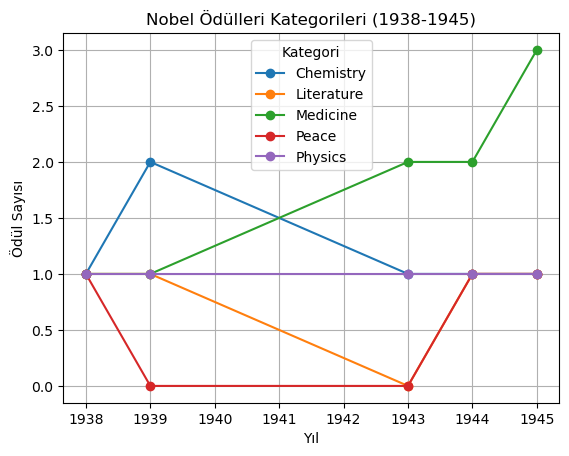

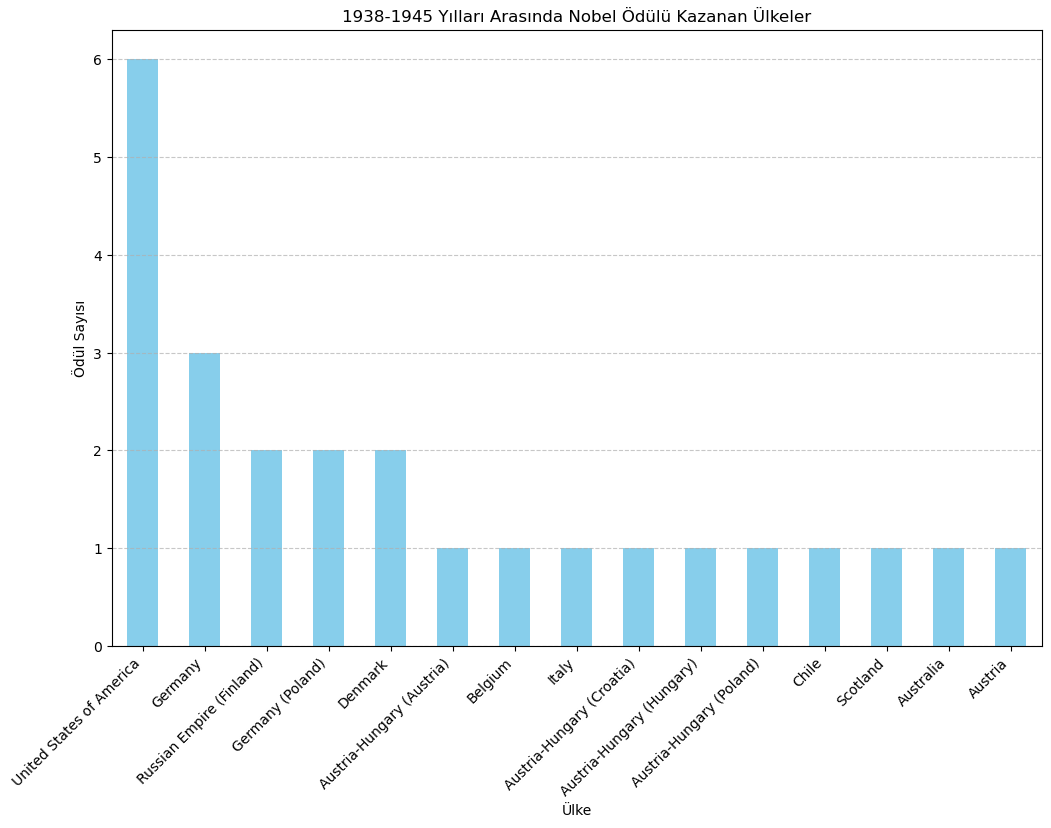

In [20]:
#1938-1945 yılları arasında Nobel ödülü kazananların kategorilerini görselleştirelim
data_filtered = data[(data['yil'] >= 1938) & (data['yil'] <= 1945)]
category_counts = data_filtered.groupby(['yil', 'kategori']).size().unstack(fill_value=0)
category_counts.plot(kind='line', marker='o')

#Grafik
plt.title('Nobel Ödülleri Kategorileri (1938-1945)')
plt.xlabel('Yıl')
plt.ylabel('Ödül Sayısı')
plt.legend(title='Kategori')
plt.grid(True)
plt.show()

#1938-1945 yılları arasında Nobel ödülü kazananların ülkelerini görselleştirelim
data_filtered = data[(data['yil'] >= 1938) & (data['yil'] <= 1945)]
country_counts = data_filtered['dogum_ulkesi'].value_counts()

#Grafik
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', color='skyblue')
plt.title('1938-1945 Yılları Arasında Nobel Ödülü Kazanan Ülkeler')
plt.xlabel('Ülke')
plt.ylabel('Ödül Sayısı')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




<h2>Birinci grafik, 1938-1945 yılları arasında, tam da İkinci Dünya Savaşı'nın yaşandığı dönemi kapsamaktadır. Savaşın tüm dünyayı etkisi altına alması, bilimsel çalışmaların ve dolayısıyla Nobel Ödülleri'nin verilmesinin de önemli ölçüde etkilenmesine neden olmuştur.
Grafikte, özellikle 1940 ve 1943 yıllarında ödül sayılarında belirgin bir düşüş görülmektedir. Bu durum, savaşın bilimsel çalışmalara verdiği aradan kaynaklanıyor olabilir. Savaşın getirdiği ekonomik zorluklar, kaynakların askeri amaçlara yönlendirilmesi ve bilim insanlarının savaş çabalarına dahil olması gibi faktörler, bilimsel araştırmaların yavaşlamasına ve dolayısıyla ödül sayılarının azalmasına yol açmıştır. Edebiyat gibi beşeri bilimler, savaşın doğrudan etkileri ve dolaylı sonuçları nedeniyle daha fazla zarar görmüştür.

İkinci grafik  II. Dünya Savaşı'nın bilim dünyası üzerindeki etkilerini göstermektedir. Savaşın bilimsel çalışmaları olumsuz etkileyerek ödül sayılarında düşüşe ve ülkeler arasındaki bilimsel güç dengesinin değişmesine yol açtığı görülmektedir. Bu grafik, tarihsel olayların bilimsel faaliyetler üzerindeki etkilerini anlamak için önemli bir veri kaynağıdır.</h2>

<h1>7.1947-1991 yılları arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.(Her kategori için ayrı bir grafik olması istenmektedir)</h1>

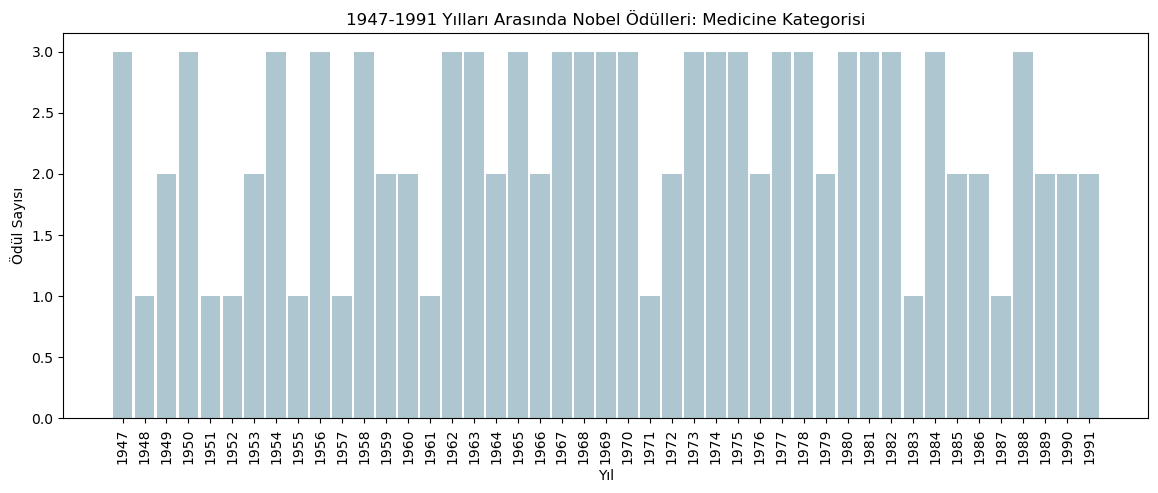

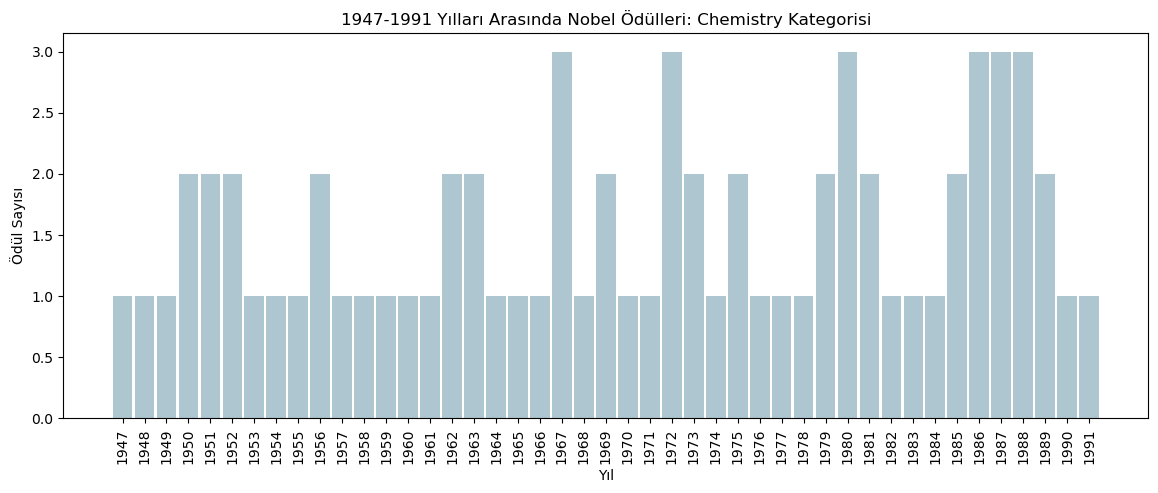

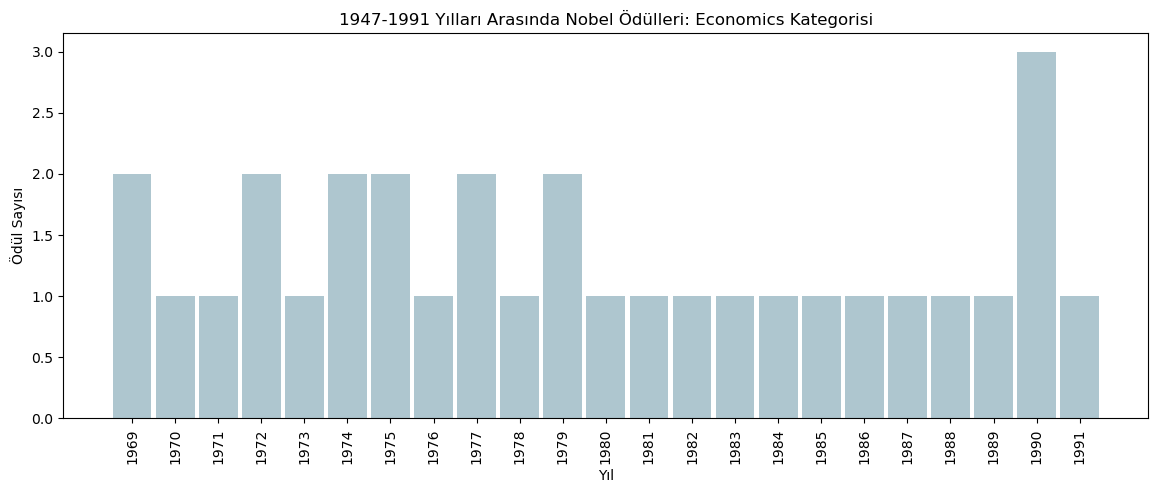

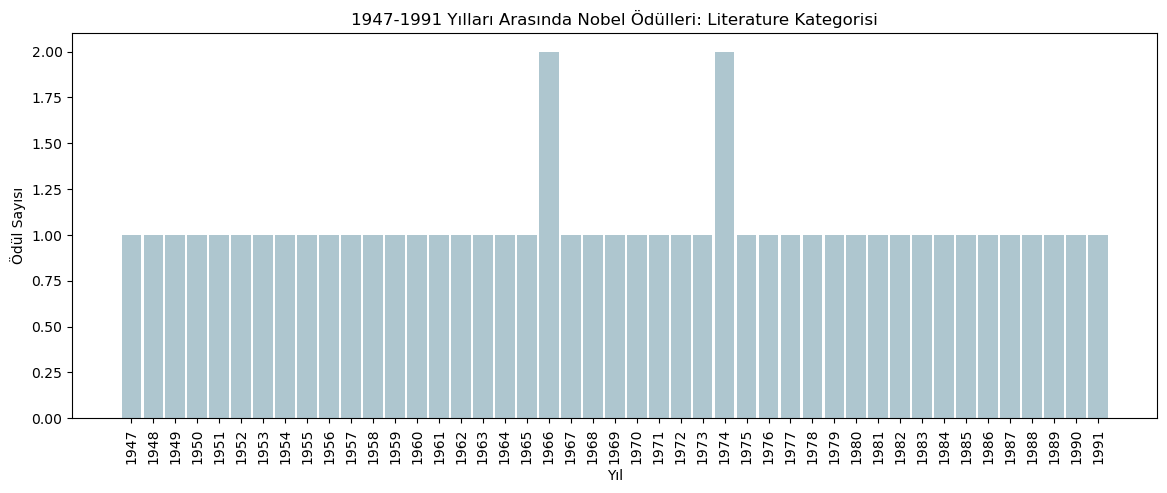

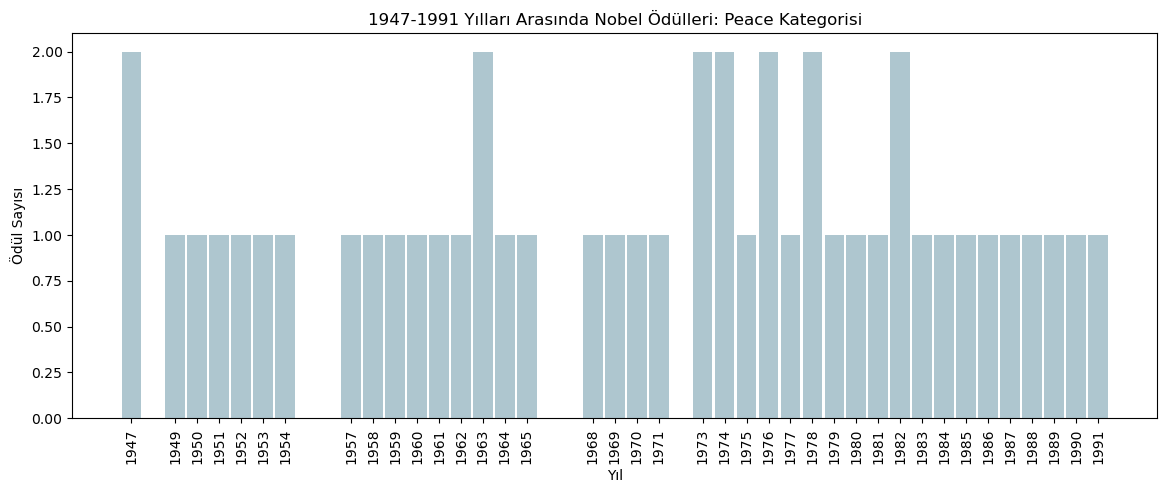

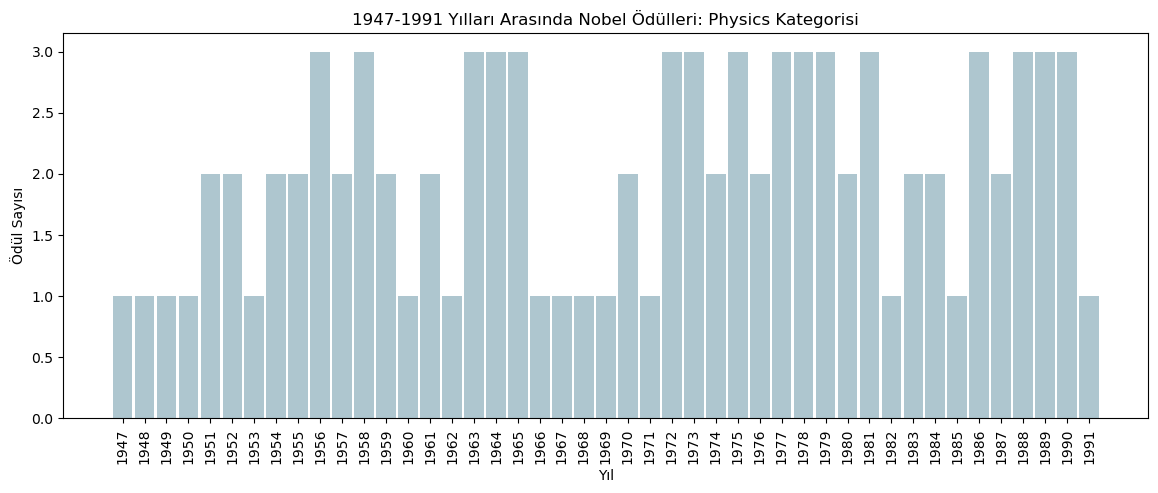

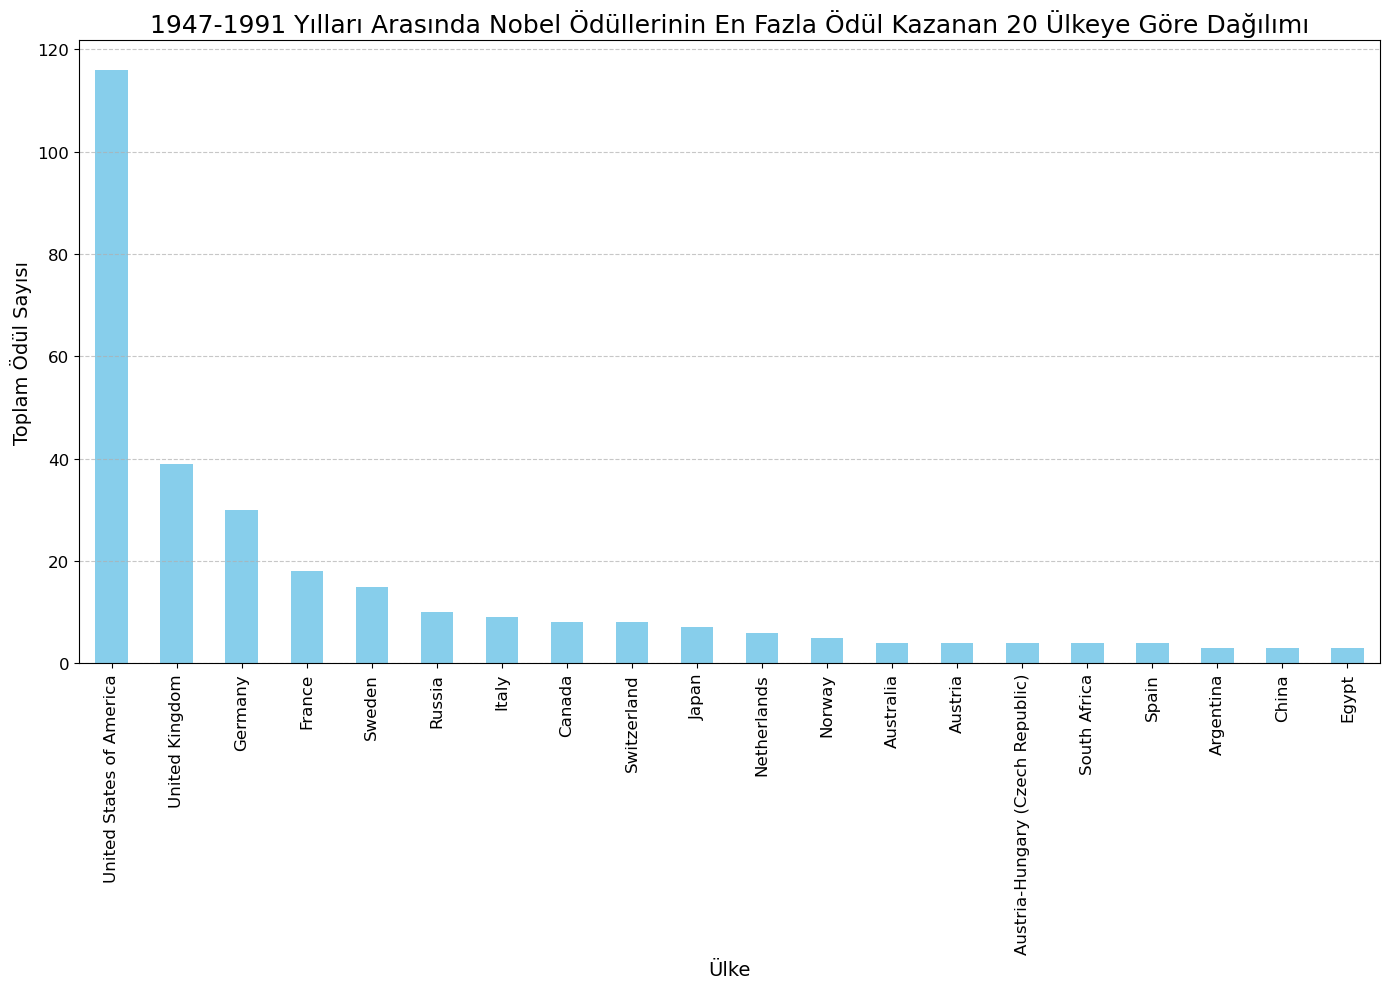

In [22]:
#MEDİCİNE kategorisi

data_filtered = data[(data['yil'] >= 1947) & (data['yil'] <= 1991)]
medicine_data = data_filtered[data_filtered['kategori'].str.lower() == 'medicine']
medicine_counts = medicine_data.groupby('yil').size()

# Grafik 
plt.figure(figsize=(14, 5))
plt.bar(medicine_counts.index, medicine_counts, color='#AEC6CF',width=0.9)
plt.title('1947-1991 Yılları Arasında Nobel Ödülleri: Medicine Kategorisi')
plt.xlabel('Yıl')
plt.ylabel('Ödül Sayısı')
plt.grid(False)
plt.xticks(medicine_counts.index, rotation=90)
plt.show()

#CHEMİSTRY kategorisi
data_filtered = data[(data['yil'] >= 1947) & (data['yil'] <= 1991)]
chemistry_data = data_filtered[data_filtered['kategori'].str.lower() == 'chemistry']
chemistry_counts = chemistry_data.groupby('yil').size()

# Grafik 
plt.figure(figsize=(14, 5))
plt.bar(chemistry_counts.index, chemistry_counts, color='#AEC6CF', width=0.9)
plt.title('1947-1991 Yılları Arasında Nobel Ödülleri: Chemistry Kategorisi')
plt.xlabel('Yıl')
plt.ylabel('Ödül Sayısı')
plt.grid(False)
plt.xticks(chemistry_counts.index, rotation=90)
plt.show()

#ECONOMİCS kategorisi
data_filtered = data[(data['yil'] >= 1947) & (data['yil'] <= 1991)]
economics_data = data_filtered[data_filtered['kategori'].str.lower() == 'economics']
economics_counts = economics_data.groupby('yil').size()

# Grafik 
plt.figure(figsize=(14, 5))
plt.bar(economics_counts.index, economics_counts, color='#AEC6CF', width=0.9)
plt.title('1947-1991 Yılları Arasında Nobel Ödülleri: Economics Kategorisi')
plt.xlabel('Yıl')
plt.ylabel('Ödül Sayısı')
plt.grid(False)
plt.xticks(economics_counts.index, rotation=90)
plt.show()

#LİTERATURE kategorisi
data_filtered = data[(data['yil'] >= 1947) & (data['yil'] <= 1991)]
literature_data = data_filtered[data_filtered['kategori'].str.lower() == 'literature']
literature_counts = literature_data.groupby('yil').size()

# Grafik 
plt.figure(figsize=(14, 5))
plt.bar(literature_counts.index, literature_counts, color='#AEC6CF', width=0.9)
plt.title('1947-1991 Yılları Arasında Nobel Ödülleri: Literature Kategorisi')
plt.xlabel('Yıl')
plt.ylabel('Ödül Sayısı')
plt.grid(False)
plt.xticks(literature_counts.index, rotation=90)
plt.show()

#PEACE kategorisi

data_filtered = data[(data['yil'] >= 1947) & (data['yil'] <= 1991)]
peace_data = data_filtered[data_filtered['kategori'].str.lower() == 'peace']
peace_counts = peace_data.groupby('yil').size()

# Grafik 
plt.figure(figsize=(14, 5))
plt.bar(peace_counts.index, peace_counts, color='#AEC6CF', width=0.9)
plt.title('1947-1991 Yılları Arasında Nobel Ödülleri: Peace Kategorisi')
plt.xlabel('Yıl')
plt.ylabel('Ödül Sayısı')
plt.grid(False)
plt.xticks(peace_counts.index, rotation=90)
plt.show()

#PHYSİCS kategorisi
data_filtered = data[(data['yil'] >= 1947) & (data['yil'] <= 1991)]
physics_data = data_filtered[data_filtered['kategori'].str.lower() == 'physics']
physics_counts = physics_data.groupby('yil').size()

# Grafik 
plt.figure(figsize=(14, 5))
plt.bar(physics_counts.index, physics_counts, color='#AEC6CF', width=0.9)
plt.title('1947-1991 Yılları Arasında Nobel Ödülleri: Physics Kategorisi')
plt.xlabel('Yıl')
plt.ylabel('Ödül Sayısı')
plt.grid(False)
plt.xticks(physics_counts.index, rotation=90)
plt.show()


#1947-1991 yılları arasında Nobel Ödülü kazananların ülkelerini görselleştirelim
data_filtered = data[(data['yil'] >= 1947) & (data['yil'] <= 1991)]
country_counts = data_filtered.groupby(['yil', 'dogum_ulkesi']).size().unstack(fill_value=0)
country_totals = country_counts.sum(axis=0)
top_countries = country_totals.nlargest(20)

# Grafik
plt.figure(figsize=(14, 10)) 
top_countries.plot(kind='bar', color='skyblue')

plt.title('1947-1991 Yılları Arasında Nobel Ödüllerinin En Fazla Ödül Kazanan 20 Ülkeye Göre Dağılımı', fontsize=18)
plt.xlabel('Ülke', fontsize=14)
plt.ylabel('Toplam Ödül Sayısı', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()











<h2>Grafiklere baktığımızda, 1947-1991 yılları arasında en fazla Nobel Ödülü'nün "Medicine" (Tıp) kategorisinde, en az ödülün ise "Economics" (Ekonomi) kategorisinde verildiğini gözlemliyoruz. Bu durumu açıklamak için birkaç önemli faktörü dikkate almak gerekmektedir.

Tıp kategorisinde elde edilen yüksek ödül sayısının, bu dönemde yaşanan savaşlar ve sağlık krizlerinin etkisiyle ilişkili olduğu söylenebilir. Bu yıllar, antibiyotiklerin keşfi, genetik araştırmalar ve aşılar gibi önemli tıbbi buluşlara tanıklık etti. Bu gelişmeler, tıp alanındaki ilerlemeleri hızlandırmış ve dolayısıyla Nobel Ödülleri'nin bu kategoride yoğunlaşmasına neden olmuştur.

Öte yandan, Ekonomi ödülü diğer kategorilere göre daha genç bir ödüldür. İlk olarak 1969 yılında verilmiş olan bu ödül, tarihsel olarak daha az sayıda ödül kazananı ile sınırlıdır. Ayrıca, ekonomik teorilerin kabulü ve uygulamaları zaman alabilir, bu da ödüllerin daha az sayıda verilmesine neden olabilir. 

En fazla ödül kazanan 20 ülkeye baktığımızda ise ABD'nin en ön sırada olduğunu görüyoruz. Bunun birkaç sebebi var ;
Soğuk Savaş döneminde ABD'nin bilimsel ve teknolojik gelişmelerde öncü olma çabası, özellikle Sovyetler Birliği ile olan rekabet nedeniyle arttı. Uzay yarışı ve nükleer silahlanma gibi alanlarda yapılan yatırımlar, bilimsel başarıların artmasına neden oldu. Ayrıca Soğuk Savaş döneminde ABD, Avrupa ve diğer bölgelerden yetenekli bilim insanlarını çekti. Bu göçmen bilim insanları, ABD'nin Nobel Ödülleri'ndeki başarısına önemli katkılarda bulundu. Örneğin, birçok Nobel ödüllü bilim insanı, ABD'ye göç etmiş araştırmacılardı.</h2>

<h1>8.Kimya, Edebiyat, Barış, Fizik ve Tıp kategorilerindeki 2000 sonrasındaki kişilerin ülkelerini, yaşlarını görselleştirin.(Her bir Kategori için ayrı görselleştirme yapılması istenmektedir) Veriyi yorumlayınız.</h1>

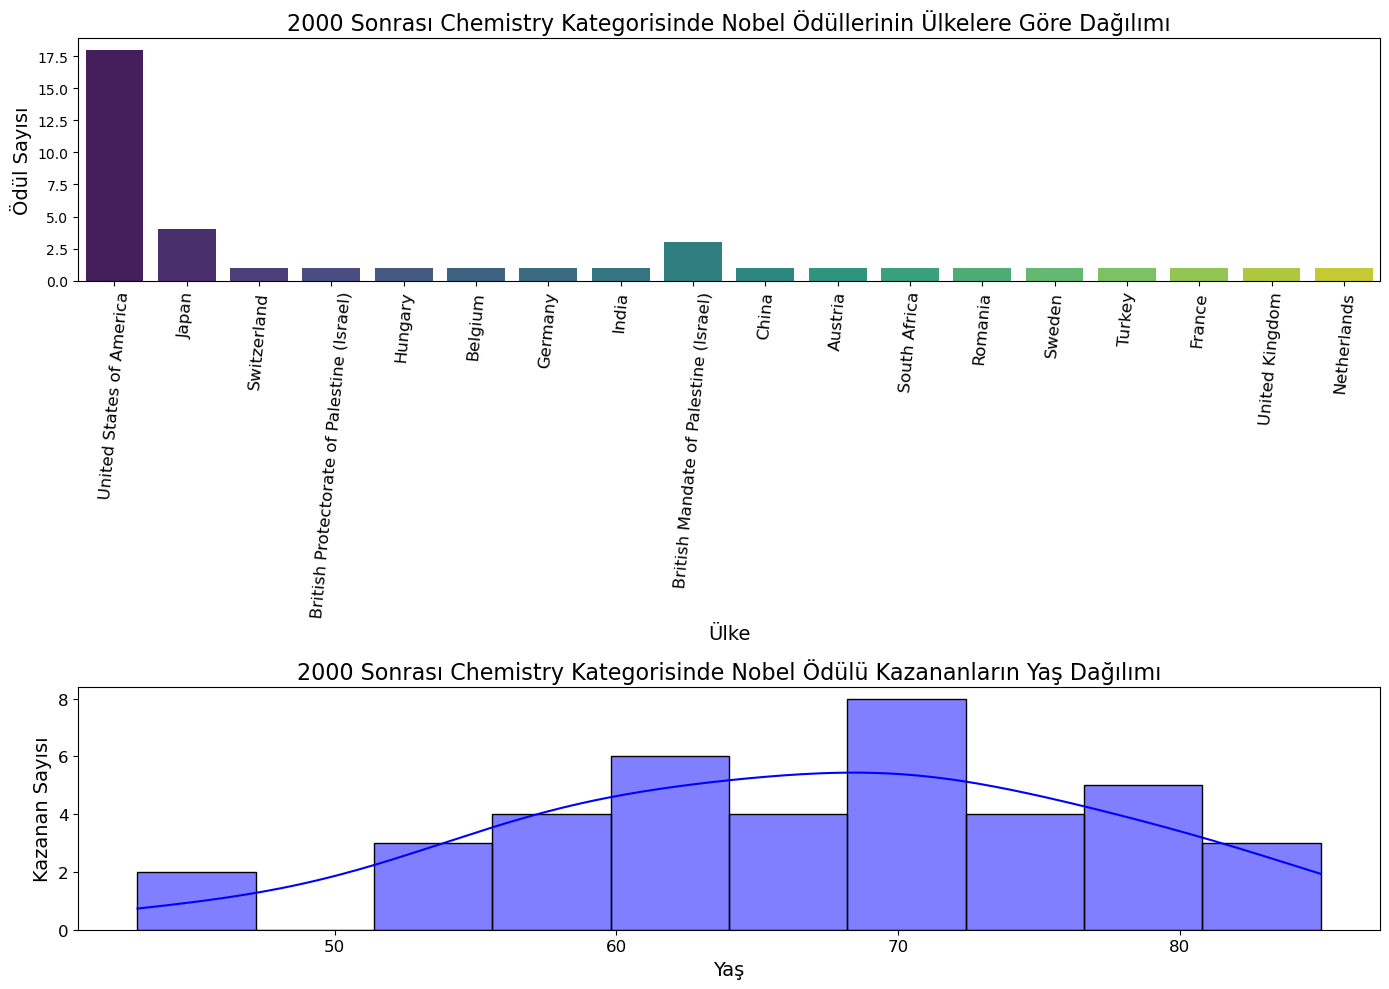

In [47]:
#CHEMİSTRY
import seaborn as sns
data_filtered = data[(data['yil'] > 2000) & (data['kategori'].str.lower() == 'chemistry')].copy()
data_filtered.loc[:, 'dogum_tarihi'] = pd.to_datetime(data_filtered['dogum_tarihi'])
data_filtered.loc[:, 'yas'] = data_filtered['yil'] - data_filtered['dogum_tarihi'].dt.year

# Grafik 
plt.figure(figsize=(14,10))

# Ülke Dağılımı Grafiği
plt.subplot(2,1,1)
sns.countplot(data=data_filtered, x='dogum_ulkesi', hue='dogum_ulkesi', palette='viridis')
plt.title('2000 Sonrası Chemistry Kategorisinde Nobel Ödüllerinin Ülkelere Göre Dağılımı', fontsize=16)
plt.xlabel('Ülke', fontsize=14)
plt.ylabel('Ödül Sayısı', fontsize=14)
plt.xticks(rotation=85, fontsize=12)

# Yaş Dağılımı Grafiği
plt.subplot(2,1,2)  
sns.histplot(data=data_filtered, x='yas', bins=10, kde=True, color='blue')
plt.title('2000 Sonrası Chemistry Kategorisinde Nobel Ödülü Kazananların Yaş Dağılımı', fontsize=16)
plt.xlabel('Yaş', fontsize=14)
plt.ylabel('Kazanan Sayısı', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()




<h2>2000 yılı sonrası teknolojide önemli gelişmelerin ( Laboratuvar otomasyon sistemleri, kimyasal deneylerin ve sentezlerin hızını artırdı, bilgisayar destekli tasarımlarla kuantum kimyası ve moleküler dinamik simülasyonları, kimyasal sistemlerin davranışlarını modellemekte ve tahmin etmekte kullanıldı vb.) olduğunu göz önünde bulundurursak bunun kimya bilimi üzerinde olan etkilerini yok sayamayız.İlk grafikte en dikkat çekici nokta, Amerika Birleşik Devletleri'nin açık ara bir farkla lider durumda olmasıdır. Bu durum, ABD'nin bilimsel araştırmalara yaptığı yatırımları ve bilimsel alandaki gücünü göstermektedir. İkinci grafikte Kimya Nobel Ödülü'nü kazanan bilim insanlarının büyük bir kısmının 50-70 yaş aralığında olduğu görülmektedir. Bu durum, bilimsel alanda önemli başarılara ulaşmanın genellikle uzun ve deneyim gerektiren bir süreç olduğunu göstermektedir.</h2>

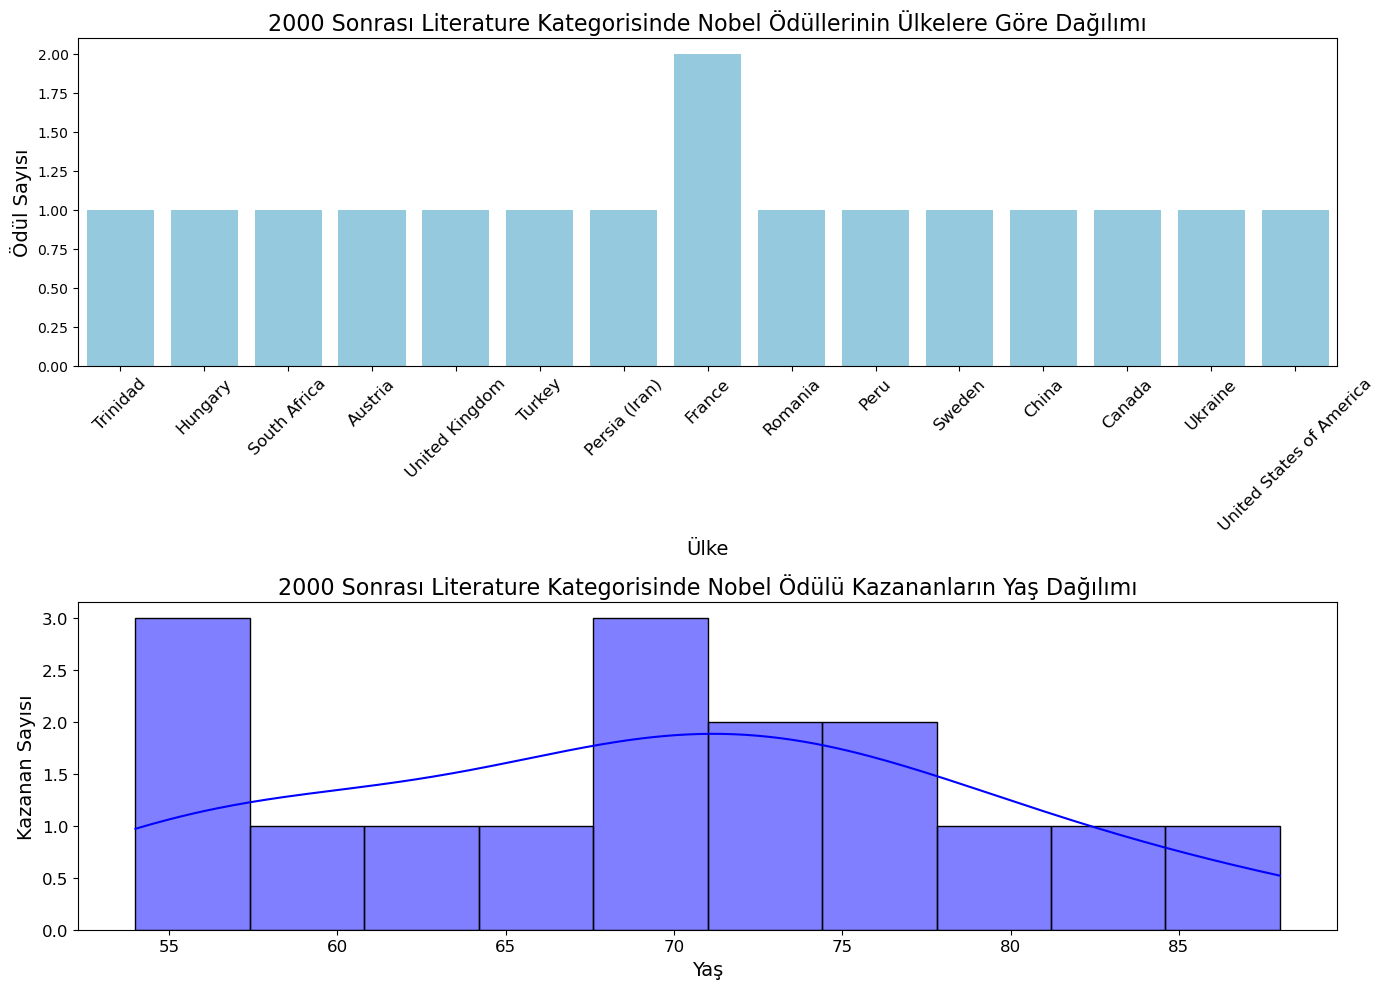

In [49]:
#LİTERATURE
data_filtered = data[(data['yil'] > 2000) & (data['kategori'].str.lower() == 'literature')].copy()
data_filtered['dogum_tarihi'] = pd.to_datetime(data_filtered['dogum_tarihi'])
data_filtered['yas'] = data_filtered['yil'] - data_filtered['dogum_tarihi'].dt.year

# Grafik 
plt.figure(figsize=(14, 10))  

# Ülke Dağılımı Grafiği
plt.subplot(2, 1, 1)
sns.countplot(data=data_filtered, x='dogum_ulkesi', color='skyblue')  
plt.title('2000 Sonrası Literature Kategorisinde Nobel Ödüllerinin Ülkelere Göre Dağılımı', fontsize=16)
plt.xlabel('Ülke', fontsize=14)
plt.ylabel('Ödül Sayısı', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  

# Yaş Dağılımı Grafiği
plt.subplot(2, 1, 2)
sns.histplot(data=data_filtered, x='yas', bins=10, kde=True, color='blue')  
plt.title('2000 Sonrası Literature Kategorisinde Nobel Ödülü Kazananların Yaş Dağılımı', fontsize=16)
plt.xlabel('Yaş', fontsize=14)
plt.ylabel('Kazanan Sayısı', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()



<h2>Fransızca, edebiyat için oldukça zengin ve ifade gücü yüksek bir dildir.Bunun etkilerini ilk grafikte görmekteyiz. Ayrıca grafikte hemen göze çarpan, ülkelerin büyük bir çoğunluğunun yaklaşık olarak aynı sayıda ödül almış olmasıdır. Bu durum, edebiyat alanında çeşitliliğin olduğunu ve birçok farklı ülkeden yazarın uluslararası alanda tanınma fırsatı bulduğunu göstermektedir. İkinci grafikte ise yaş dağılımını görmekteyiz. Ödülü kazanan yazarların yaş dağılımı, edebiyatın genç yaşta başlayan ancak olgunluk ve deneyimle daha da zenginleşen bir sanat dalı olduğunu göstermektedir.</h2>

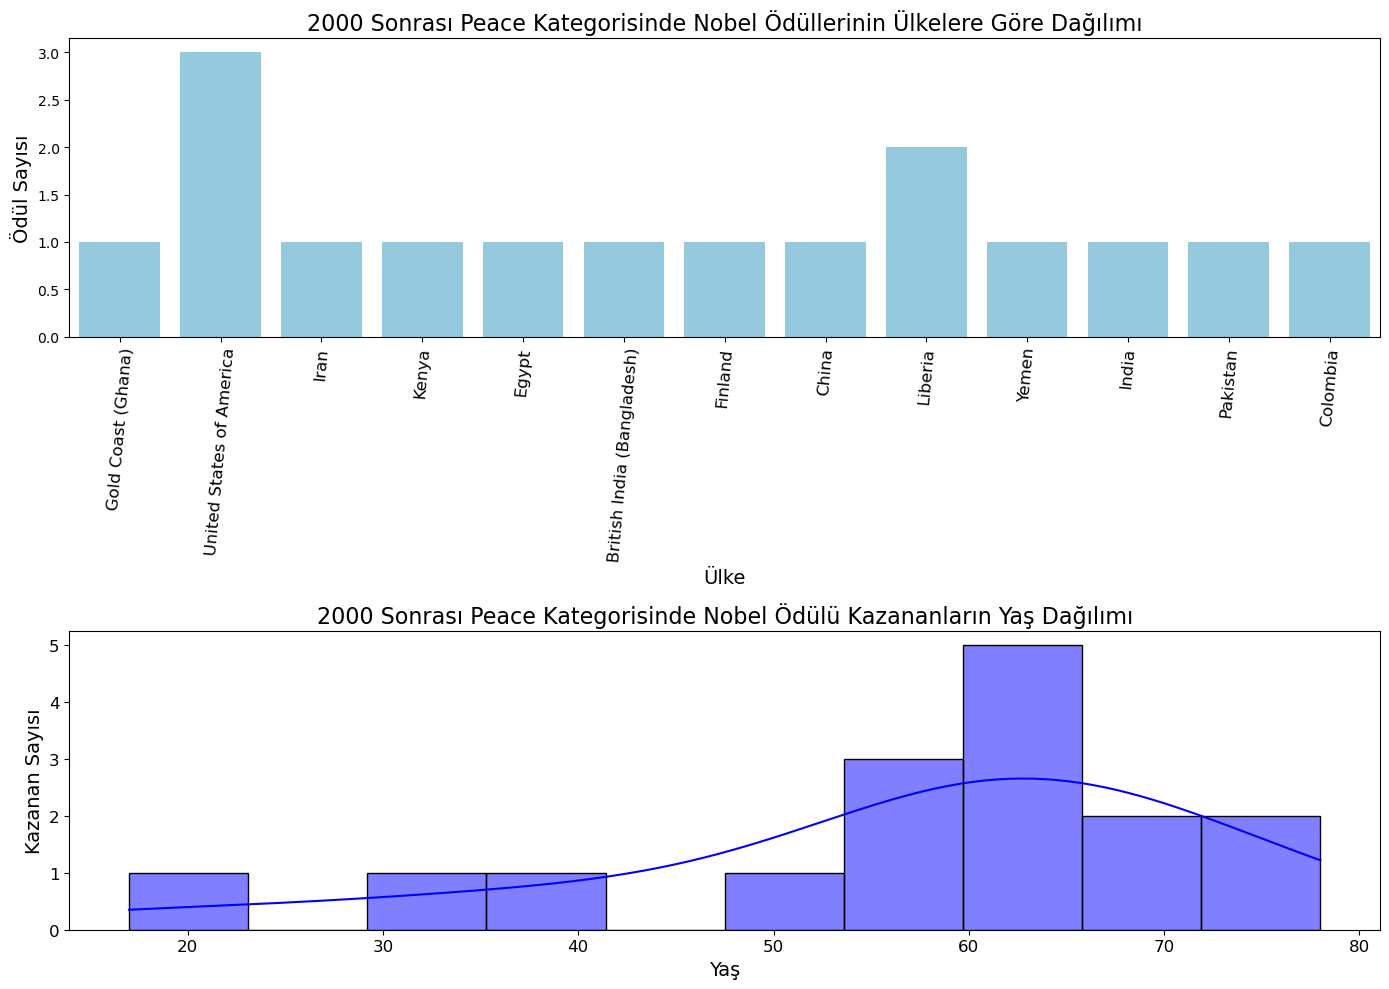

In [30]:
#PEACE
data_filtered = data[(data['yil'] > 2000) & (data['kategori'].str.lower() == 'peace')].copy()
data_filtered['dogum_tarihi'] = pd.to_datetime(data_filtered['dogum_tarihi'])
data_filtered['yas'] = data_filtered['yil'] - data_filtered['dogum_tarihi'].dt.year

# Grafik 
plt.figure(figsize=(14, 10))

# Ülke Dağılımı Grafiği
plt.subplot(2, 1, 1)
sns.countplot(data=data_filtered, x='dogum_ulkesi', color='skyblue')  
plt.title('2000 Sonrası Peace Kategorisinde Nobel Ödüllerinin Ülkelere Göre Dağılımı', fontsize=16)
plt.xlabel('Ülke', fontsize=14)
plt.ylabel('Ödül Sayısı', fontsize=14)
plt.xticks(rotation=85, fontsize=12)  

# Yaş Dağılımı Grafiği
plt.subplot(2, 1, 2)
sns.histplot(data=data_filtered, x='yas', bins=10, kde=True, color='blue')  
plt.title('2000 Sonrası Peace Kategorisinde Nobel Ödülü Kazananların Yaş Dağılımı', fontsize=16)
plt.xlabel('Yaş', fontsize=14)
plt.ylabel('Kazanan Sayısı', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


<h2>2000 yılı sonrası barış alanında pek çok önemli gelişme yaşandı. Kolombiya'da FARC ile barış anlaşması sağlandı ve BM çatışma çözümünde daha fazla arabuluculuk yaptı.Paris İklim Anlaşması gibi küresel işbirlikleri ve terörizmle mücadelede uluslararası işbirliği güçlendirildi.
Çatışma riski yüksek bölgelerde erken uyarı sistemleri ve barış eğitimi programları geliştirildi.
Sosyal medya ve dijital diplomasi, bilgi yayımı ve uluslararası iletişimi etkili bir şekilde sağladı.
Wangari Maathai ve Barack Obama gibi figürler Nobel Barış Ödülü ile ödüllendirildi. İlk grafiğe baktığımızda  ABD'li bireylerin veya kurumların barış çabalarının uluslararası alanda daha sık takdir gördüğünü görüyoruz. Fakat Afrika kıtasından Ghana (Gold Coast), Kenya, Liberya gibi ülkelerin de ödül alması, kıtadaki barış çabalarının göz ardı edilmediğini gösterir.Bu iki grafik birlikte değerlendirildiğinde, 2000 yılından sonra Nobel Barış Ödülü'nün farklı coğrafyalardan ve farklı yaş gruplarından kişilere verildiği görülmektedir. Bu durum, Nobel Komitesi'nin ödülleri verirken coğrafi çeşitliliğe ve yaş faktörüne dikkat ettiğini gösterir. Ayrıca, grafikte 20'li yaşlarda ödül alan kişilerin de olduğu görülmektedir. Bu durum, genç yaşta önemli başarılara imza atan kişilerin de olduğunu gösterir.</h2>

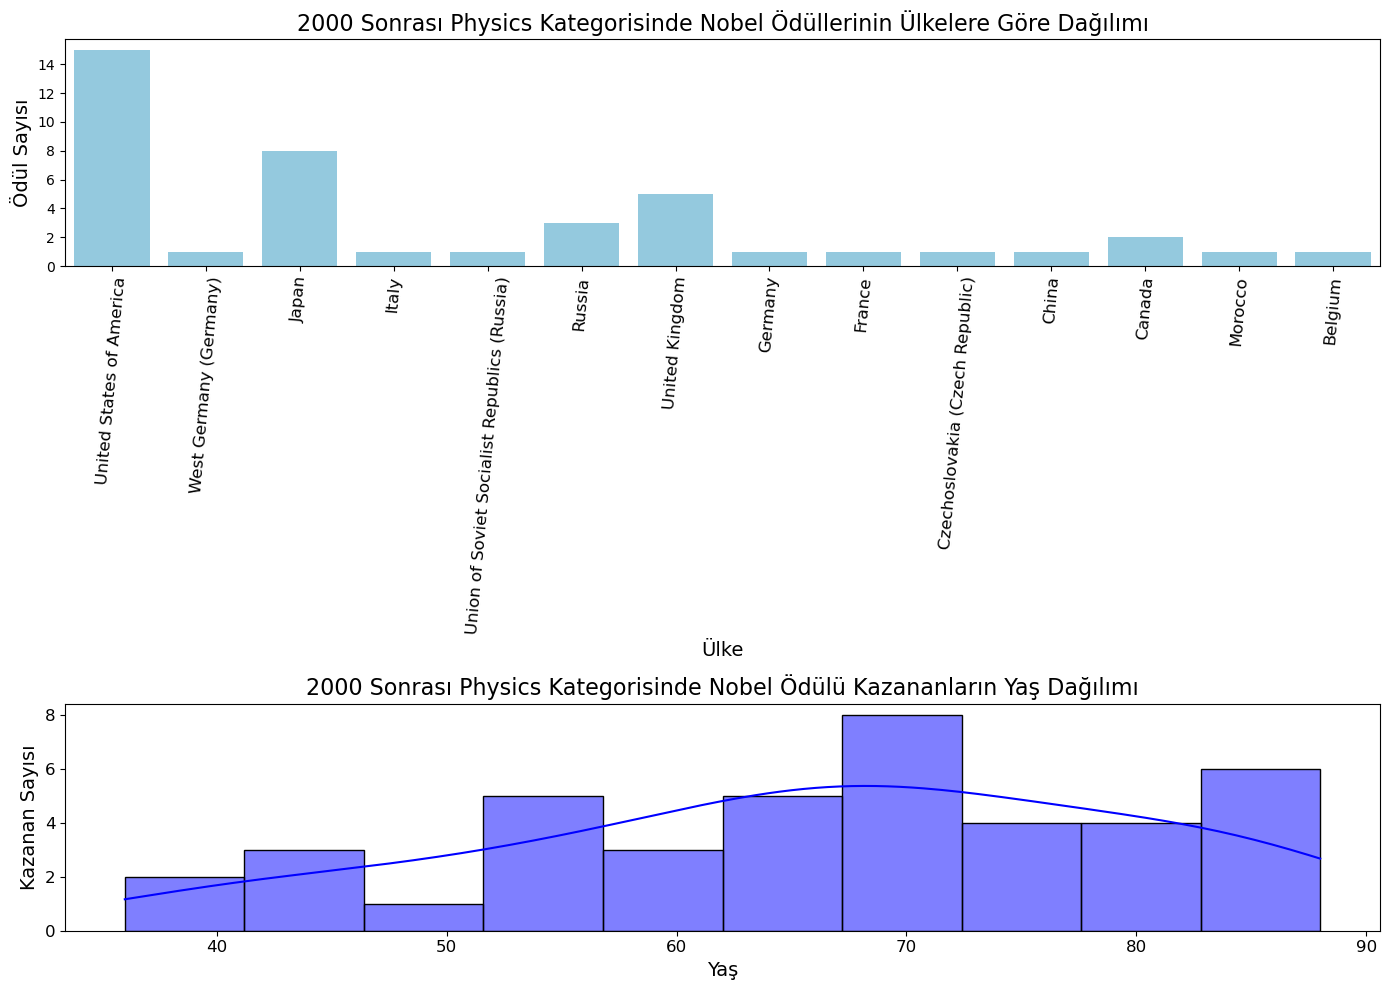

In [55]:
#PHYSİCS
data_filtered = data[(data['yil'] > 2000) & (data['kategori'].str.lower() == 'physics')].copy()
data_filtered['dogum_tarihi'] = pd.to_datetime(data_filtered['dogum_tarihi'])
data_filtered['yas'] = data_filtered['yil'] - data_filtered['dogum_tarihi'].dt.year

# Grafik 
plt.figure(figsize=(14, 10))

# Ülke Dağılımı Grafiği
plt.subplot(2, 1, 1)
sns.countplot(data=data_filtered, x='dogum_ulkesi', color='skyblue')  
plt.title('2000 Sonrası Physics Kategorisinde Nobel Ödüllerinin Ülkelere Göre Dağılımı', fontsize=16)
plt.xlabel('Ülke', fontsize=14)
plt.ylabel('Ödül Sayısı', fontsize=14)
plt.xticks(rotation=85, fontsize=12)  

# Yaş Dağılımı Grafiği
plt.subplot(2, 1, 2)
sns.histplot(data=data_filtered, x='yas', bins=10, kde=True, color='blue')  
plt.title('2000 Sonrası Physics Kategorisinde Nobel Ödülü Kazananların Yaş Dağılımı', fontsize=16)
plt.xlabel('Yaş', fontsize=14)
plt.ylabel('Kazanan Sayısı', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


<h2>İlk grafikte Amerika Birleşik Devletleri'nin tıpkı Kimya alanında olduğu gibi fizik alanında da liderliği bırakmadığını görüyoruz. Bu durum, ABD'nin bilimsel araştırmalara yaptığı yatırımın ve güçlü akademik altyapısının bir yansıması olarak değerlendirilebilir.Japonya'nın yükselişi ise Asya'nın bilim dünyasındaki artan etkisini göstermekte, fizik alanında yeni bir küresel oyuncu olduğuna işaret etmektedir. Yaş dağılımına bakacak olursak yine bilimsel çalışmaların uzun ve deneyim gerektiren bir süreç olduğunu görmekteyiz.</h2>

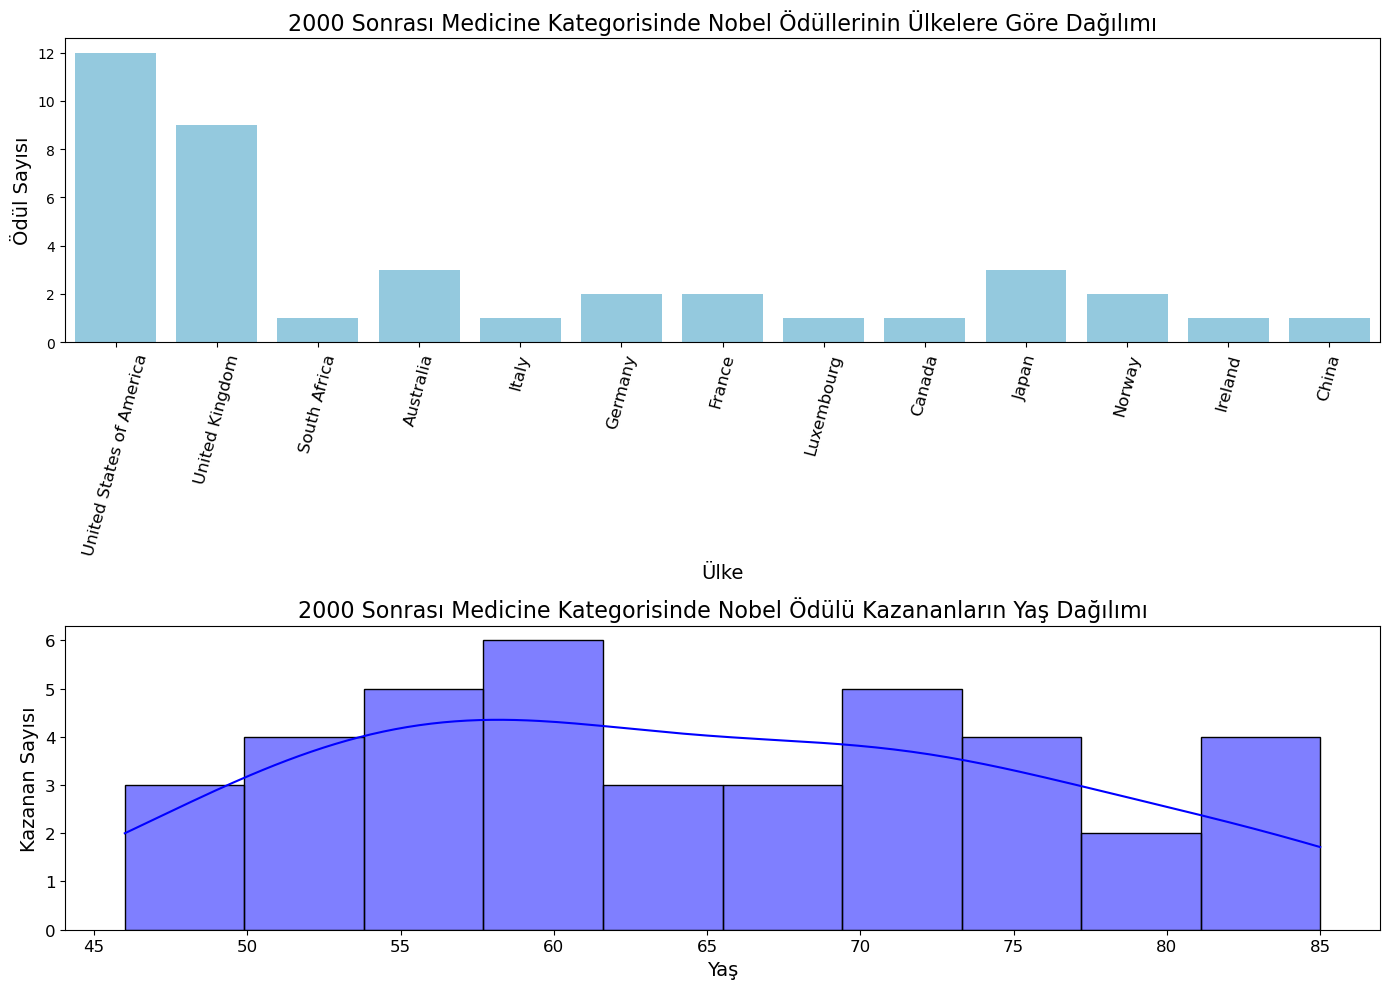

In [32]:
#MEDİCİNE
data_filtered = data[(data['yil'] > 2000) & (data['kategori'].str.lower() == 'medicine')].copy()
data_filtered['dogum_tarihi'] = pd.to_datetime(data_filtered['dogum_tarihi'])
data_filtered['yas'] = data_filtered['yil'] - data_filtered['dogum_tarihi'].dt.year

# Grafik 
plt.figure(figsize=(14, 10))

# Ülke Dağılımı Grafiği
plt.subplot(2, 1, 1)
sns.countplot(data=data_filtered, x='dogum_ulkesi', color='skyblue') 
plt.title('2000 Sonrası Medicine Kategorisinde Nobel Ödüllerinin Ülkelere Göre Dağılımı', fontsize=16)
plt.xlabel('Ülke', fontsize=14)
plt.ylabel('Ödül Sayısı', fontsize=14)
plt.xticks(rotation=75, fontsize=12)  

# Yaş Dağılımı Grafiği
plt.subplot(2, 1, 2)
sns.histplot(data=data_filtered, x='yas', bins=10, kde=True, color='blue')  
plt.title('2000 Sonrası Medicine Kategorisinde Nobel Ödülü Kazananların Yaş Dağılımı', fontsize=16)
plt.xlabel('Yaş', fontsize=14)
plt.ylabel('Kazanan Sayısı', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


<h2>Bu iki grafik birlikte değerlendirildiğinde, 2000 yılından sonra Nobel Tıp Ödülleri'nin ağırlıklı olarak ABD ve Avrupa ülkelerindeki bilim insanlarına verildiği, ancak diğer gelişmiş ve gelişmekte olan ülkelerden de önemli katkılar geldiği gözlemlenmektedir. ABD CRISPR Teknolojisi,yapay zeka ve dijital sağlık ile öne çıkarken Almanya biyoteknolojik çalışmalarıyla, Çin yapay organlarla, Japonya robotik cerrahi ile öne çıkmıştır. Ödül kazanan bilim insanlarının çoğunluğunun deneyimli araştırmacılardan oluştuğu görülmekle birlikte, hem genç hem de ileri yaşlardaki bilim insanlarının da kayda değer başarılara imza attığı anlaşılmaktadır. Bu durum, Nobel Tıp Ödülleri'nin sadece belirli bir coğrafi bölgeye veya yaş grubuna değil, küresel ölçekte ve farklı deneyim seviyelerindeki bilim insanlarına dağıldığını göstermektedir.</h2>